
# Project: NCIS-Gun Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> In this project, descriptive analysis will be carried out on NCIS-gun_data dataset which was obtained from kaggle datasets which comprises of 27 features that includes; gun_permit, gun types, state, date, to be focused on in this project and so on, so as to evaluate the below listed objectives and make conclusions based on the insights obtained from the analysis.

### Project Objectives
> - To determine the most privately sold gun type on the average in the US from 1998 to September 2017
> - To determine the most common gun type in New York from 2007 to September 2017
> - To determine which state in the US has the highest gun permit from 1998 to September 2017

### Question(s) for Analysis

> - On the Average what type of gun are mostly sold in private in the US from 1998 to September 2017?
> - Which gun type is the most common in New York from 2007 to 2017?
> - Which state in the US has the highest gun permit from 1998 to September 2017?
 

### Packages Importation 

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 

# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling



In [3]:
# Load the data from the my googlesheets using the sheets address link after being set to public edit.
url_id = '1pRHPReh0eL3_2dfiL2IC_z6ReWP7P23U'
df = pd.read_excel(f"https://docs.google.com/spreadsheets/d/{url_id}/export?format=xlsx")

In [4]:
df.head() #Taking a glance at my top 5 data points and the features to get an idea of dataframe look life

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [5]:
# For further investigation of the entire data
df.shape

(12485, 27)

Now, as we can see the data contains 12485 rows and 27 columns with features that include; state, month, gun types, permits and so on.


In [6]:
df.info() # To get more information about my dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
month                        12485 non-null object
state                        12485 non-null object
permit                       12461 non-null float64
permit_recheck               1100 non-null float64
handgun                      12465 non-null float64
long_gun                     12466 non-null float64
other                        5500 non-null float64
multiple                     12485 non-null int64
admin                        12462 non-null float64
prepawn_handgun              10542 non-null float64
prepawn_long_gun             10540 non-null float64
prepawn_other                5115 non-null float64
redemption_handgun           10545 non-null float64
redemption_long_gun          10544 non-null float64
redemption_other             5115 non-null float64
returned_handgun             2200 non-null float64
returned_long_gun            2145 non-null float64
returned_other   

df.info has given me more data about my data, so now i need to drop some irrelevant columns and remove null values in the data cleaning phase.

In [7]:
df.isnull().sum() # To get the null summary in the dataset

month                            0
state                            0
permit                          24
permit_recheck               11385
handgun                         20
long_gun                        19
other                         6985
multiple                         0
admin                           23
prepawn_handgun               1943
prepawn_long_gun              1945
prepawn_other                 7370
redemption_handgun            1940
redemption_long_gun           1941
redemption_other              7370
returned_handgun             10285
returned_long_gun            10340
returned_other               10670
rentals_handgun              11495
rentals_long_gun             11660
private_sale_handgun          9735
private_sale_long_gun         9735
private_sale_other            9735
return_to_seller_handgun     10010
return_to_seller_long_gun     9735
return_to_seller_other       10230
totals                           0
dtype: int64


### Data Cleaning
> Time to drop the unwanted columns and deal with the null values .
 

In [8]:
# Dropping some unwanted columns and saving it as new dataframe

new_df = df.drop(df.loc[:, 'prepawn_handgun':'rentals_long_gun'].columns, axis=1)

In [9]:
new_df.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [10]:
# More dropping of the unwanted columns
new_df.drop(new_df.loc[:, 'return_to_seller_handgun':'totals'].columns, axis=1, inplace=True)
new_df.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,private_sale_handgun,private_sale_long_gun,private_sale_other
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,9.0,16.0,3.0
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,17.0,24.0,1.0
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,38.0,12.0,2.0
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,13.0,23.0,0.0
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,0.0,0.0


In [11]:
new_df.drop('permit_recheck', axis='columns', inplace=True) # Last Column drop
new_df.tail(20)

,month,state,permit,handgun,long_gun,other,multiple,admin,private_sale_handgun,private_sale_long_gun,private_sale_other
12465,1998-11,North Carolina,524.0,87.0,695.0,NaN,4,0.0,NaN,NaN,NaN
12466,1998-11,North Dakota,0.0,20.0,38.0,NaN,0,0.0,NaN,NaN,NaN
12467,1998-11,Ohio,0.0,502.0,434.0,NaN,16,0.0,NaN,NaN,NaN
12468,1998-11,Oklahoma,0.0,259.0,361.0,NaN,13,0.0,NaN,NaN,NaN
12469,1998-11,Oregon,0.0,153.0,186.0,NaN,5,0.0,NaN,NaN,NaN
12470,1998-11,Pennsylvania,0.0,5.0,8.0,NaN,4,0.0,NaN,NaN,NaN
12471,1998-11,Puerto Rico,0.0,1.0,1.0,NaN,0,0.0,NaN,NaN,NaN
12472,1998-11,Rhode Island,0.0,13.0,23.0,NaN,2,0.0,NaN,NaN,NaN
12473,1998-11,South Carolina,0.0,0.0,6.0,NaN,0,0.0,NaN,NaN,NaN
12474,1998-11,South Dakota,0.0,8.0,66.0,NaN,0,0.0,NaN,NaN,NaN


To deal with the NaN in this data, fillna with 0 will be used since the NA in this datasets means there are not recorded data on the specific date, that is no purchase of any of the gun type, no permit and no private sales of the any gun type on the specific date or day.

since there are lots of null values in the dataset, there best practice for me is to fill the Nas with no records which is 0 to avoid total reduction of the data.

In [12]:
new_df.fillna(0, inplace=True) # Filling the NaNs with 0 values to retain most of the data points
new_df.tail(20)

,month,state,permit,handgun,long_gun,other,multiple,admin,private_sale_handgun,private_sale_long_gun,private_sale_other
12465,1998-11,North Carolina,524.0,87.0,695.0,0.0,4,0.0,0.0,0.0,0.0
12466,1998-11,North Dakota,0.0,20.0,38.0,0.0,0,0.0,0.0,0.0,0.0
12467,1998-11,Ohio,0.0,502.0,434.0,0.0,16,0.0,0.0,0.0,0.0
12468,1998-11,Oklahoma,0.0,259.0,361.0,0.0,13,0.0,0.0,0.0,0.0
12469,1998-11,Oregon,0.0,153.0,186.0,0.0,5,0.0,0.0,0.0,0.0
12470,1998-11,Pennsylvania,0.0,5.0,8.0,0.0,4,0.0,0.0,0.0,0.0
12471,1998-11,Puerto Rico,0.0,1.0,1.0,0.0,0,0.0,0.0,0.0,0.0
12472,1998-11,Rhode Island,0.0,13.0,23.0,0.0,2,0.0,0.0,0.0,0.0
12473,1998-11,South Carolina,0.0,0.0,6.0,0.0,0,0.0,0.0,0.0,0.0
12474,1998-11,South Dakota,0.0,8.0,66.0,0.0,0,0.0,0.0,0.0,0.0


In [13]:
new_df.isnull().sum() # Checking if there are still NaNs

month                    0
state                    0
permit                   0
handgun                  0
long_gun                 0
other                    0
multiple                 0
admin                    0
private_sale_handgun     0
private_sale_long_gun    0
private_sale_other       0
dtype: int64

Now the data looks clean with zero NaNs

In [14]:
new_df.dtypes

month                     object
state                     object
permit                   float64
handgun                  float64
long_gun                 float64
other                    float64
multiple                   int64
admin                    float64
private_sale_handgun     float64
private_sale_long_gun    float64
private_sale_other       float64
dtype: object



<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1: On the Average what type of gun are mostly sold in private in the US from 1998 to September 2017

In [17]:
# Analysing the data to satistify objective 1 by getting the mean statistic of the commonly sold gun type in the US from 1998 to september 2017
# Using the index loc to filter and get the mean of the average sales of the three different gun types sold in private.
new_df.iloc[:, 8:].mean()

private_sale_handgun     3.289868
private_sale_long_gun    2.555707
private_sale_other       0.226912
dtype: float64

The Result shows that handguns are the most sold gun type on average in the US from 1998 to 2017 with the generated mean of 3.2.

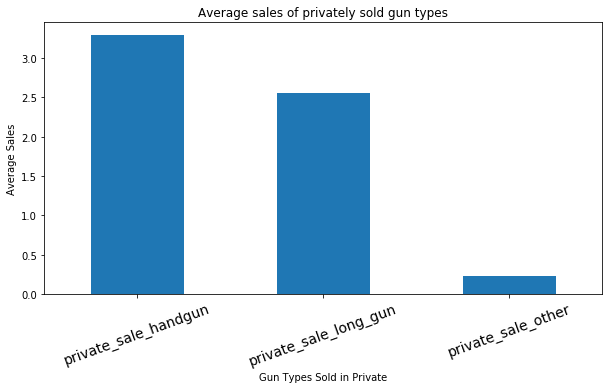

In [18]:
# Visualizing the results for more clarity
plt.figure(figsize=(10,5))
new_df.iloc[:, 8:].mean().plot(kind='bar');
plt.xlabel('Gun Types Sold in Private')
plt.ylabel('Average Sales')
plt.title('Average sales of privately sold gun types')
plt.xticks(rotation=20, fontsize=14);

# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


From the visual output it was clear that the gun type sold the most on average is handgun, which implies that the handgun are mostly sold in private during the specified year in the US.
However, the difference between the handgun and longgun private average sale is rather small.

### Research Question 2: Which gun type is the most common in New York from 2007 to 2017?

In [19]:
# Analysing the research question 2 to satistify the second objetive.
# Using Loc subsetting method to filter out the desired variables which are new york state and month.
gun_ny = new_df.loc[(new_df['state'] == 'New York') & (new_df['month'] >= '2007-01')]

In [20]:
gun_ny.head() # Peaping at the top 5 rows of the subsetted df based on the above coded criteria

,month,state,permit,handgun,long_gun,other,multiple,admin,private_sale_handgun,private_sale_long_gun,private_sale_other
34,2017-09,New York,2933.0,8392.0,16213.0,998.0,185,0.0,348.0,328.0,19.0
89,2017-08,New York,2952.0,9159.0,13239.0,891.0,158,0.0,380.0,280.0,12.0
144,2017-07,New York,2315.0,9212.0,11301.0,879.0,170,0.0,356.0,187.0,16.0
199,2017-06,New York,2602.0,10784.0,11309.0,921.0,196,0.0,399.0,273.0,18.0
254,2017-05,New York,3224.0,11633.0,12857.0,957.0,183,0.0,443.0,247.0,22.0


Now we have new dataframe for only new york state in the US.

In [21]:
# Analysing the new york data to determine objective 2
gun_ny.iloc[:, 3:6].sum() # Using i loc with sum statistic

handgun      889975.0
long_gun    1833384.0
other         57234.0
dtype: float64

The results shows that long-gun in the most common gun in new york since 1998 to 2017 due to its high number of purchase.

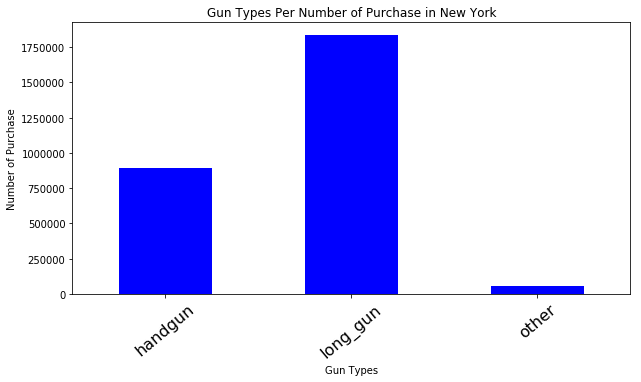

In [22]:
# Visualization
plt.figure(figsize=(10,5))
gun_ny.iloc[:, 3:6].sum().plot(kind='bar', color='blue')
plt.xlabel('Gun Types')
plt.ylabel('Number of Purchase')
plt.title('Gun Types Per Number of Purchase in New York')
plt.xticks(rotation=40, fontsize=16);

From the chart above we can confirm that long_gun has a significant high number of purchase of the speciied years.

### Research Question 3: Which state in the US has the highest gun permit from 1998 to September 2017?

In [31]:
# Analysis of objective 3
df.groupby('state')['permit'].sum() # grouping the data points by state and the getting their of permit of the years.

state
Alabama                  1047441.0
Alaska                     13352.0
Arizona                   710509.0
Arkansas                  507951.0
California               6530543.0
Colorado                  426970.0
Connecticut              1595270.0
Delaware                   22720.0
District of Columbia         330.0
Florida                  1088802.0
Georgia                  1786708.0
Guam                           0.0
Hawaii                    197321.0
Idaho                     369220.0
Illinois                 9498639.0
Indiana                  2965760.0
Iowa                     1467974.0
Kansas                    155471.0
Kentucky                24926779.0
Louisiana                  84376.0
Maine                      17260.0
Mariana Islands                0.0
Maryland                  345839.0
Massachusetts            1365225.0
Michigan                 3313076.0
Minnesota                2453637.0
Mississippi                99945.0
Missouri                  459241.0
Montana       

This gives the sum of permits in each state in the US over the specified years.

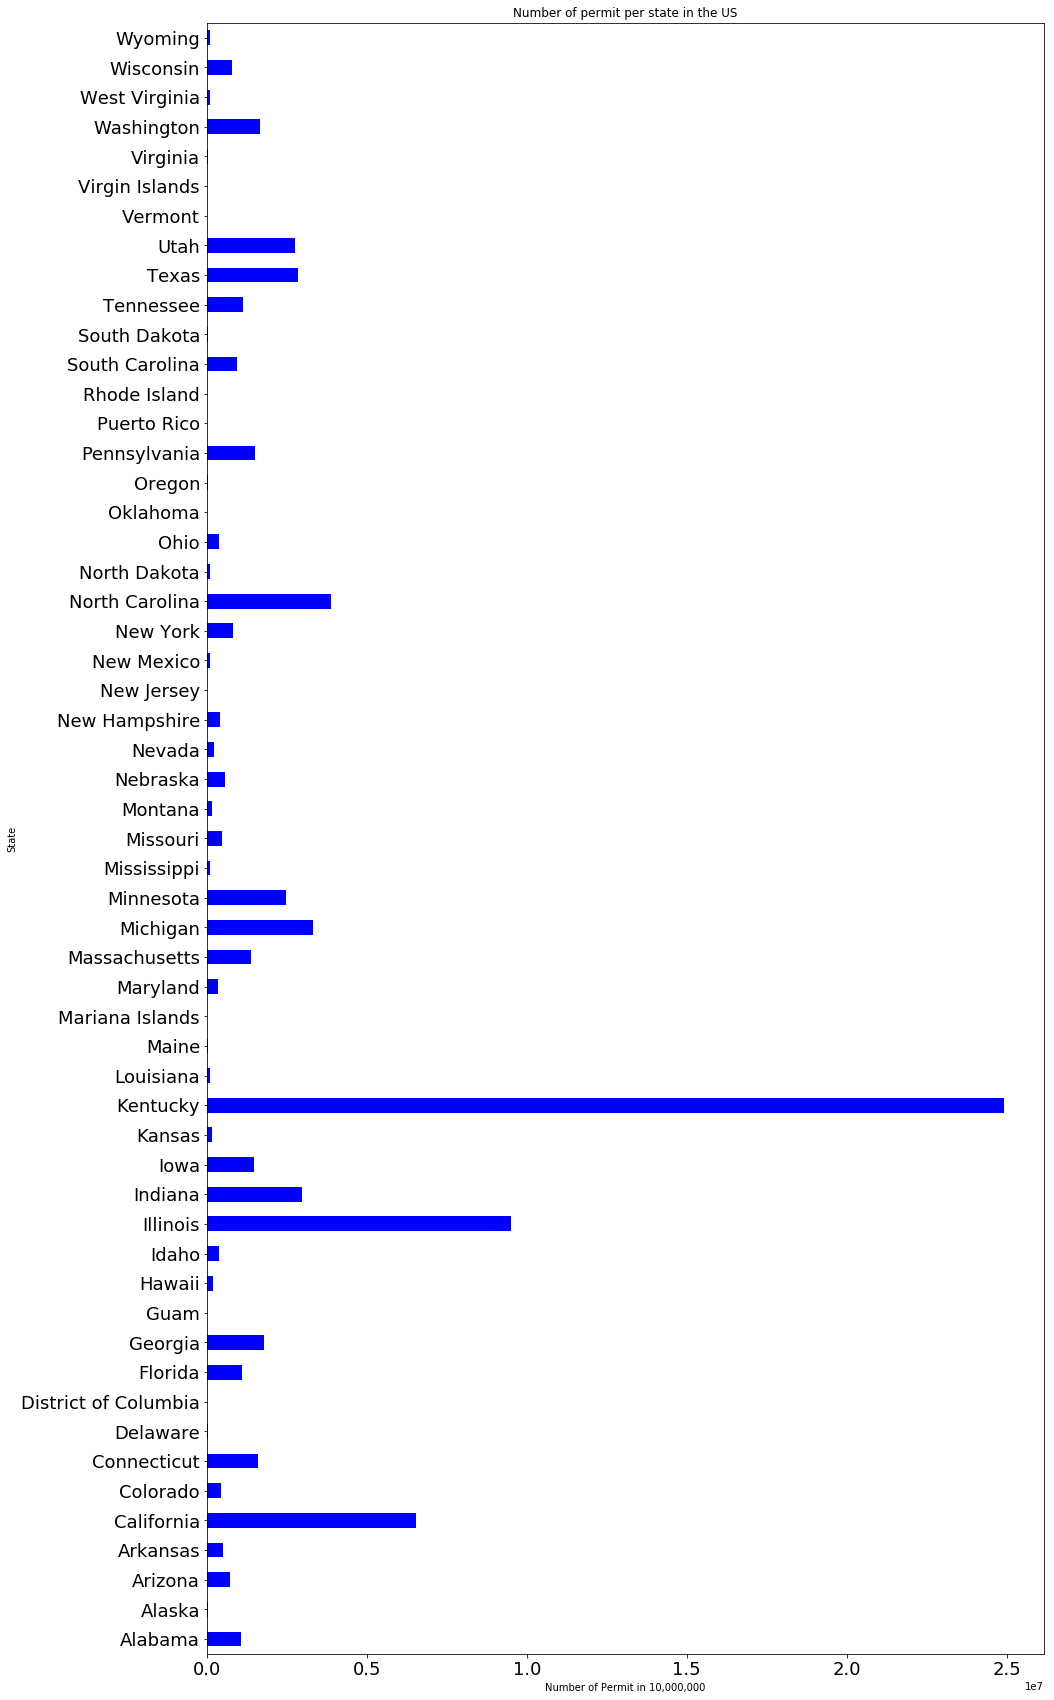

In [34]:
# Visualization for objective 3
plt.figure(figsize=(15,30))
df.groupby('state')['permit'].sum().plot(kind='barh', color='blue');
plt.xlabel('Number of Permit in 10,000,000')
plt.ylabel('State')
plt.title('Number of permit per state in the US')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18);

<a id='conclusions'></a>
## Conclusions

> From the result from objective 1 analysis, it can be concluded that handguns are mostly the gun type sold in private in the us, however the mean diference of the private sales of handgun and long-guns is small.
> For objective two, it can be concluded as well that the most common type of gun in New York over the specified period of time is the Long-gun due to it's higher number of purchase of the years.
> Conclusively for objective 3 the state with the highest gun permit grants is kentucky with a significant high number of grants over the years.

### Limitation

> Lack of full comprehension and more knowledge about data; how it was generated and more metadata of the data.  


In [36]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0